In [1]:

import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/mocsy-master')
import mocsy
import numpy as np
print(mocsy)

<module 'mocsy' from '/gpfs/home/mep22dku/scratch/SOZONE/mocsy-master/mocsy.cpython-37m-x86_64-linux-gnu.so'>


In [2]:
import matplotlib.pyplot as plt
import cmocean as cm

In [3]:
mocsy.mvars

<fortran object>

In [4]:
zero = 0
TAr = 2000 * 1e-6
DICr = 2050 * 1e-6
mocsy.mvars(temp=10, sal=30, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/m3', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')

(array([6.30663566]),
 array([15.16351208]),
 array([15.16351208]),
 array([0.00070155]),
 array([0.00135422]),
 array([1.49113133e-06]),
 array([2.24669102e-05]),
 array([3.57348382e-05]),
 array([1.36298811]),
 array([1023.0507501]),
 array([0.]),
 array([10.]))

In [5]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
def gimme_pco2mesh(tS,tT):
#
    S = np.zeros([600,600])
    T = np.zeros([600,600])
    TA = np.zeros([600,600])
    DIC = np.zeros([600,600])


    S[:] = tS
    T[:] = tT

    for i in range(0,600):
        DIC[i,:] = 1800 + 1*i
    for i in range(0,600):
        TA[:,i] = 1800 + 1*i

    TA_DIC = TA-DIC

    Sr = np.ravel(S)
    Tr = np.ravel(T)  
    DICr = np.ravel(DIC) * 1e-6
    TAr = np.ravel(TA) * 1e-6

    zero = DICr *0

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                        optcon='mol/kg', optt='Tinsitu', optp='db',
                        optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pco2r = pco2.reshape(600,600)
    # pHr_vTD = pH.reshape(400,400)
    OmegaAr = OmegaA.reshape(600,600)
    
    return DIC, TA, TA_DIC, pco2r, OmegaAr

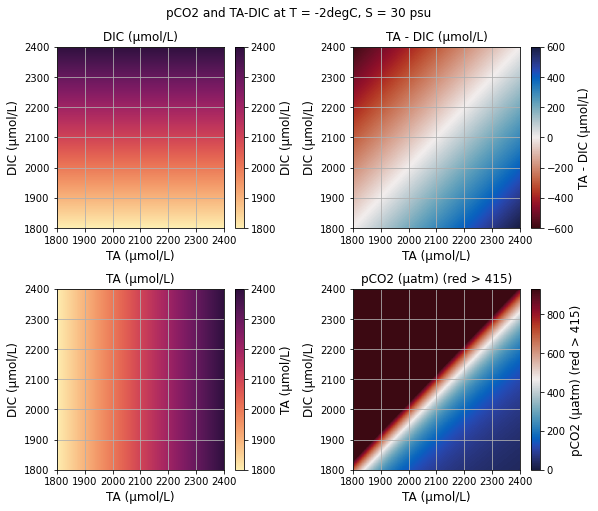

In [6]:
tS = 30; tT = -2
DIC, TA, TA_DIC, pco2r, OmegaAr = gimme_pco2mesh(tS,tT)

tcm = cm.cm.matter
fact = 0.6; fs = 12
fig, axs = plt.subplots(2,2, figsize=(14*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plts = [DIC, TA_DIC, TA, pco2r]
tits = ['DIC (μmol/L)','TA - DIC (μmol/L)', 'TA (μmol/L)', 'pCO2 (μatm) (red > 415)']
mins = [1800, -600, 1800, 0]
maxs = [2400, 600, 2400, 930]
cmaps = [cm.cm.matter, cm.cm.balance_r, cm.cm.matter, cm.cm.balance]
for i in range(0,4):
# v_min = 200
# v_max = 800
    t_cmap = cm.cm.matter

    tplt = plts[i]
    mesh = axs[i].pcolormesh(tplt, cmap=cmaps[i], vmin = mins[i], vmax = maxs[i])
    axs[i].set_title(tits[i],fontsize = fs )
    cbar = fig.colorbar(mesh, ax=axs[i])
    cbar.set_label(tits[i], fontsize = fs )
    axs[i].set_xlabel('TA (μmol/L)', fontsize = fs)
    axs[i].set_ylabel('DIC (μmol/L)', fontsize = fs )
    # axs[3].set_xticks(fontsize = 14)
    # axs[3].set_yticks(fontsize = 14)
    major_xTD = np.arange(0, 601, 100)
    x_labTD = (['1800','1900','2000','2100','2200','2300','2400'])
    axs[i].grid()
    
    axs[i].set_xticks(major_xTD)
    axs[i].set_yticks(major_xTD)
    axs[i].set_xticklabels(x_labTD)
    axs[i].set_yticklabels(x_labTD)

plt.suptitle(f'pCO2 and TA-DIC at T = {tT}degC, S = {tS} psu')
plt.tight_layout()

In [7]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
def gimme_pco2mesh_TADIC(tS,tT):
#
    S = np.zeros([600,600])
    T = np.zeros([600,600])
    TA_DIC = np.zeros([600,600])
    DIC = np.zeros([600,600])


    S[:] = tS
    T[:] = tT

    for i in range(0,600):
        TA_DIC[i,:] = -300 + 1*i
    for i in range(0,600):
        DIC[:,i] = 1800 + 1*i

    TA = TA_DIC + DIC

    Sr = np.ravel(S)
    Tr = np.ravel(T)  
    DICr = np.ravel(DIC) * 1e-3
    TAr = np.ravel(TA) * 1e-3

    zero = DICr *0
    patm1 = zero+1

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=patm1, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='db',
                        optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pco2r = pco2.reshape(600,600)
    pHr = pH.reshape(600,600)
    OmegaAr = OmegaA.reshape(600,600)
    
    return DIC, TA, TA_DIC, pco2r, pHr, OmegaAr

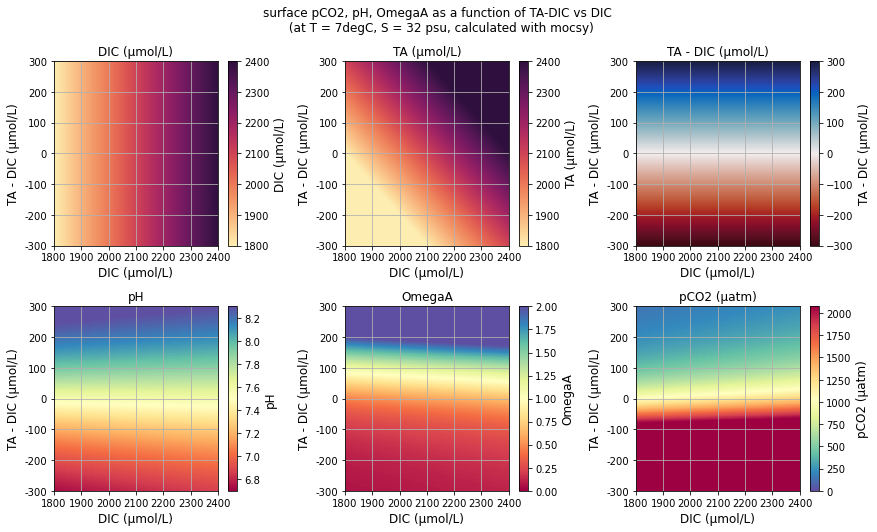

In [19]:
tS = 32; tT = 7
DIC, TA, TA_DIC, pco2r, pHr, OmegaAr = gimme_pco2mesh_TADIC(tS,tT)

tcm = cm.cm.matter
fact = 0.6; fs = 12
fig, axs = plt.subplots(2,3, figsize=(20.5*fact, 12.5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plts = [DIC, TA, TA_DIC, pHr, OmegaAr, pco2r]
tits = ['DIC (μmol/L)','TA (μmol/L)', 'TA - DIC (μmol/L)',
        'pH', 'OmegaA', 'pCO2 (μatm)']
mins = [1800, 1800, -300, 6.7, 0, 0]
maxs = [2400, 2400, 300, 8.3, 2, 415*5]
cmaps = [cm.cm.matter, cm.cm.matter, cm.cm.balance_r,  
         'Spectral','Spectral','Spectral_r']
for i in range(0,6):
# v_min = 200
# v_max = 800
    t_cmap = cm.cm.matter

    tplt = plts[i]
    mesh = axs[i].pcolormesh(tplt, cmap=cmaps[i], vmin = mins[i], vmax = maxs[i])
    axs[i].set_title(tits[i],fontsize = fs )
    cbar = fig.colorbar(mesh, ax=axs[i])
    cbar.set_label(tits[i], fontsize = fs )
    axs[i].set_xlabel('DIC (μmol/L)', fontsize = fs)
    axs[i].set_ylabel('TA - DIC (μmol/L)', fontsize = fs )
    # axs[3].set_xticks(fontsize = 14)
    # axs[3].set_yticks(fontsize = 14)
    major_xTD = np.arange(0, 601, 100)
    x_labTD = (['1800','1900','2000','2100','2200','2300','2400'])
    y_labTD = (['-300','-200','-100','0','100','200','300'])
    axs[i].grid()
    
    axs[i].set_xticks(major_xTD)
    axs[i].set_yticks(major_xTD)
    axs[i].set_xticklabels(x_labTD)
    axs[i].set_yticklabels(y_labTD)

plt.suptitle(f'surface pCO2, pH, OmegaA as a function of TA-DIC vs DIC \n (at T = {tT}degC, S = {tS} psu, calculated with mocsy)')
plt.tight_layout()

In [15]:
help(mocsy.mvars)

Help on fortran object:

class fortran(object)
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __repr__(self, /)
 |      Return repr(self).



In [9]:
# #salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

# #salinity 0-35
# #
# S = np.zeros([400,400])
# T = np.zeros([400,400])
# TA = np.zeros([400,400])
# DIC = np.zeros([400,400])

# S[:] = 30
# T[:] = 10

# for i in range(0,400):
#     DIC[i,:] = 1800 + 1*i
# for i in range(0,400):
#     TA[:,i] = 1800 + 1*i
    
# Sr = np.ravel(S)
# Tr = np.ravel(T)  
# DICr = np.ravel(DIC) * 1e-6
# TAr = np.ravel(TA) * 1e-6

# zero = DICr *0

# response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
#                    sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
#                     optcon='mol/kg', optt='Tinsitu', optp='db',
#                     optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
# pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

# pHr_vTD = pH.reshape(400,400)
# OmegaAr_vTD = OmegaA.reshape(400,400)
# pco2_vTD = pco2.reshape(400,400)